<a href="https://colab.research.google.com/github/rjmcoder/CNN/blob/main/cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_train[0].shape

(32, 32, 3)

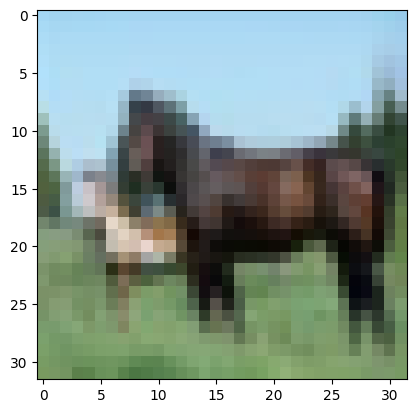

In [8]:
plt.imshow(x_train[12])

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

Labels:</br>
0 - airplane</br>
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck

In [14]:
from tensorflow.keras.models import Sequential      # building the model sequentially by adding layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [15]:
model = Sequential()

# lets start real simple with 1 conv layer and 1 pooling layer.

# filters are usually powers of 2, stride will be default of (1,1), padding is default of VALID since 28%4 (image size / kernel size) = 0
# convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))  # input_shape is a MUST parameter determined by your data, (filters, kernel_size, activation) are hyperparameters that can be played around with.
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))  # input_shape is a MUST parameter determined by your data, (filters, kernel_size, activation) are hyperparameters that can be played around with.
# pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 79s 48ms/step - loss: 1.5260 - accuracy: 0.4501 - val_loss: 1.2845 - val_accuracy: 0.5481
Epoch 2/15
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1867 - accuracy: 0.5801 - val_loss: 1.1264 - val_accuracy: 0.5986
Epoch 3/15
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0476 - accuracy: 0.6332 - val_loss: 1.1093 - val_accuracy: 0.6065
Epoch 4/15
1563/1563 [==============================] - 94s 60ms/step - loss: 0.9385 - accuracy: 0.6709 - val_loss: 1.0368 - val_accuracy: 0.6369
Epoch 5/15
1230/1563 [======================>.......] - ETA: 17s - loss: 0.8478 - accuracy: 0.7032

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.colums

In [ ]:
# lets plot training and validation accuracy
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
# lets plot training and validation loss
metrics[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(x_test, y_cat_test, verbose=0)